#### MACHINE LEARNING EXAM NOTEBOOK BY 
#### OMODING ISAAC J25M19/008 B31331
#### OBOIRE EDISON J25M19/003 B31326
#### NASIRUMBI JOANA TENDO J25M19/021 B31364

#### MILESTONE 1: DATA LOADING AND INITIAL EXPLORATION 

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Test the problematic import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
import warnings
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from collections import Counter
from sklearn.utils import resample
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [39]:
print("-"*60)
print("CUSTOMER CHURN PREDICTION")
print("-"*60)

# Loading and previewing the dataset
print("\n LOADING AND PREVIEWING THE DATASET")
print("-" * 50)

# Initializing Kaggle API and download dataset
api = KaggleApi()
api.authenticate()
api.dataset_download_files('blastchar/telco-customer-churn', path='data', unzip=True)

# Loading the dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

------------------------------------------------------------
CUSTOMER CHURN PREDICTION
------------------------------------------------------------

 LOADING AND PREVIEWING THE DATASET
--------------------------------------------------
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
Dataset shape: (7043, 21)

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

In [40]:
# Identifying datatypes, null values, unique value counts 
print("\n DATA TYPE ANALYSIS")
print("-" * 50)
print("\nDataset Info:")
print(df.info())




 DATA TYPE ANALYSIS
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Co

In [41]:
# Handling TotalCharges conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [42]:

print("-"*60)
print("Data Types Summary:")
print("-"*60)
print(df.dtypes.value_counts())
print("-"*60)
print("Unique Values per Column:")
print("-"*60)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



------------------------------------------------------------
Data Types Summary:
------------------------------------------------------------
object     17
int64       2
float64     2
Name: count, dtype: int64
------------------------------------------------------------
Unique Values per Column:
------------------------------------------------------------
customerID: 7043 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6530 unique values
Churn: 2 unique values


In [43]:
print("\n Checking the Churn column variable")
print(df["Contract"])


 Checking the Churn column variable
0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object


In [44]:
print("\n Checking the Churn column variable")
print(df["Churn"])



 Checking the Churn column variable
0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object


In [45]:
print("-"*60)
print("Basic Statistical Summary:")
print("-"*60)
print(df.describe())

------------------------------------------------------------
Basic Statistical Summary:
------------------------------------------------------------
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000



. DATA DISTRIBUTION VISUALIZATION
--------------------------------------------------

Churn Rate Analysis:
No Churn: 73.46%
Churn: 26.54%


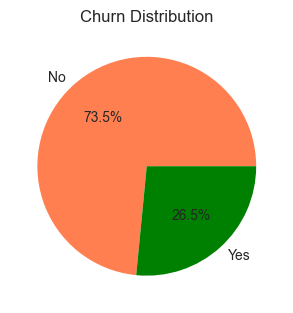

In [46]:
# Visualizing key distributions and class balance 
print("\n. DATA DISTRIBUTION VISUALIZATION")
print("-" * 50)
# Churn distribution
plt.subplot(1, 3, 2)
churn_counts = df['Churn'].value_counts()
colors = ['coral', 'green']
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Churn Distribution')
# Churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
print(f"\nChurn Rate Analysis:")
print(f"No Churn: {churn_rate['No']:.2%}")
print(f"Churn: {churn_rate['Yes']:.2%}")

Text(0, 0.5, 'Frequency')

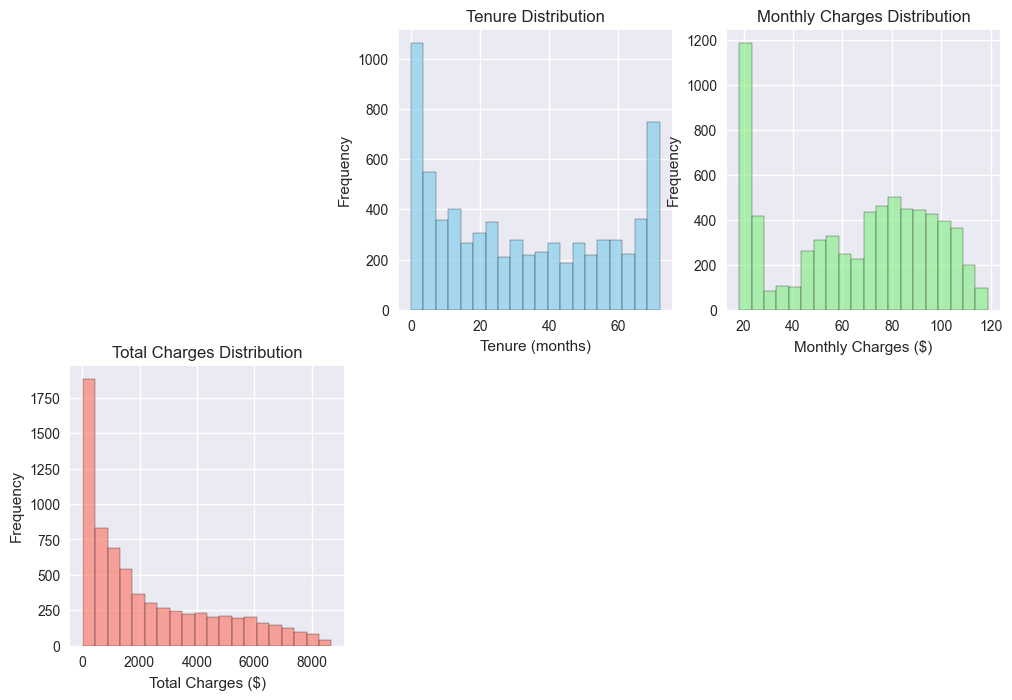

In [47]:
# Numerical features distribution
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.subplot(2, 3, 2)
plt.hist(df['tenure'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['MonthlyCharges'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df['TotalCharges'].dropna(), bins=20, alpha=0.7, color='salmon', edgecolor='black')
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

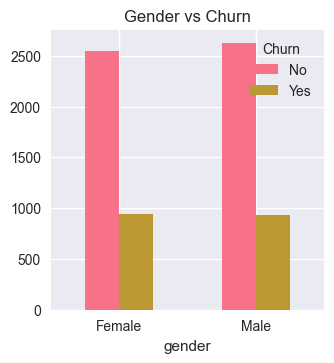

In [48]:
# Gender distribution by churn
plt.subplot(2, 3, 5)
gender_churn = pd.crosstab(df['gender'], df['Churn'])
gender_churn.plot(kind='bar', ax=plt.gca())
plt.title('Gender vs Churn')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

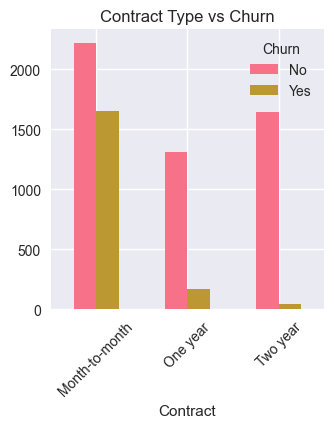

In [49]:
# Contract type vs churn
plt.subplot(2, 3, 6)
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', ax=plt.gca())
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)

#### MILESTONE 2: DATA CLEANING AND PREPROCESSING

In [50]:
# Handling missing values 
print("\n. HANDLING MISSING VALUES")
print("-" * 50)

# Check for missing values after TotalCharges conversion
print("Missing values after TotalCharges conversion:")
print(df.isnull().sum())


. HANDLING MISSING VALUES
--------------------------------------------------
Missing values after TotalCharges conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [51]:
# Handling missing TotalCharges values
missing_total_charges = df['TotalCharges'].isnull().sum()
if missing_total_charges > 0:
    print(f"\nFound {missing_total_charges} missing values in TotalCharges")
    # Fill missing values with median based on tenure
    df['TotalCharges'].fillna(df.groupby('tenure')['TotalCharges'].transform('median'), inplace=True)
    # If still missing, use overall median
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
    print("Missing values handled using median imputation")


Found 11 missing values in TotalCharges
Missing values handled using median imputation


In [52]:
# Encoding categorical variables appropriately 
print("\n. ENCODING CATEGORICAL VARIABLES")
print("-" * 50)

# Separating categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Removing ID column
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

from sklearn.preprocessing import LabelEncoder, StandardScaler
# Create a copy for preprocessing
df_processed = df.copy()
# Label encoding for binary categorical variables
binary_cols = []
multi_cols = []

for col in categorical_cols:
    unique_vals = df_processed[col].nunique()
    if unique_vals == 2:
        binary_cols.append(col)
    else:
        multi_cols.append(col)

print(f"\nBinary columns: {binary_cols}")
print(f"Multi-class columns: {multi_cols}")

# Label encode binary variables
le = LabelEncoder()
for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
# One-hot encode multi-class variables
df_processed = pd.get_dummies(df_processed, columns=multi_cols, drop_first=True)
print(f"\nDataset shape after encoding: {df_processed.shape}")
print(f"New columns after one-hot encoding: {df_processed.columns.tolist()}")


. ENCODING CATEGORICAL VARIABLES
--------------------------------------------------
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Binary columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Multi-class columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Encoded gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoded Partner: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded Dependents: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded PhoneService: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded PaperlessBilling: {'No': np.

In [53]:
# Feature scaling
print("\n. FEATURE SCALING")
print("-" * 50)
# Separate features and target
X = df_processed.drop(['customerID', 'Churn'], axis=1)
y = df_processed['Churn']

# Identify columns that need scaling
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
columns_to_scale = [col for col in columns_to_scale if col in X.columns]

print(f"Columns to be scaled: {columns_to_scale}")

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

print("Feature scaling completed using StandardScaler")
print(f"Scaled features shape: {X_scaled.shape}")


. FEATURE SCALING
--------------------------------------------------
Columns to be scaled: ['tenure', 'MonthlyCharges', 'TotalCharges']
Feature scaling completed using StandardScaler
Scaled features shape: (7043, 30)


In [54]:
# Addressing class imbalance  
print("\n. ADDRESSING CLASS IMBALANCE")
print("-" * 50)

def manual_oversample(X, y, random_state=42):
    # Convert to DataFrame if not already
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    # Combine features and target
    data = X.copy()
    data['target'] = y
    
    # Get class distribution
    class_counts = Counter(y)
    max_count = max(class_counts.values())
    
    balanced_data = []
    
    # Oversample each class to match the majority class
    for class_label, count in class_counts.items():
        class_data = data[data['target'] == class_label]
        
        if count < max_count:
            # Oversample this class
            oversampled = resample(class_data, 
                                 replace=True, 
                                 n_samples=max_count, 
                                 random_state=random_state)
            balanced_data.append(oversampled)
        else:
            # Keep as is
            balanced_data.append(class_data)
    
    # Combine all classes
    final_data = pd.concat(balanced_data, ignore_index=True)
    
    # Shuffle the data
    final_data = final_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Separate features and target
    X_resampled = final_data.drop('target', axis=1)
    y_resampled = final_data['target']
    
    return X_resampled, y_resampled

print("Original class distribution:")
print(Counter(y))
print(f"Churn rate: {(y == 1).mean():.2%}")

# Apply manual oversampling (replaces SMOTE)
X_resampled, y_resampled = manual_oversample(X_scaled, y, random_state=42)

print("\nAfter manual oversampling:")
print(Counter(y_resampled))
print(f"New dataset shape: {X_resampled.shape}")

# Additional verification
print(f"\nClass distribution verification:")
print(f"Class 0 (No Churn): {(y_resampled == 0).sum()}")
print(f"Class 1 (Churn): {(y_resampled == 1).sum()}")
print(f"Total samples: {len(y_resampled)}")
print(f"Balance achieved: {(y_resampled == 0).sum() == (y_resampled == 1).sum()}")

print("\n" + "="*60)
print("DATA PREPROCESSING COMPLETED SUCCESSFULLY")
print("="*60)


. ADDRESSING CLASS IMBALANCE
--------------------------------------------------
Original class distribution:
Counter({0: 5174, 1: 1869})
Churn rate: 26.54%

After manual oversampling:
Counter({1: 5174, 0: 5174})
New dataset shape: (10348, 30)

Class distribution verification:
Class 0 (No Churn): 5174
Class 1 (Churn): 5174
Total samples: 10348
Balance achieved: True

DATA PREPROCESSING COMPLETED SUCCESSFULLY


#### MILESTONE 3: FEATURE ENGINEERING 


MILESTONE 3: FEATURE ENGINEERING

. CREATING NEW FEATURES
--------------------------------------------------
New Features Created:
1. AvgChargePerMonth: Average monthly charge over tenure
2. ServiceIntensity: Number of additional services subscribed
3. CustomerLifecycle: Customer lifecycle stage based on tenure
4. HighValueCustomer: Binary indicator for high-value customers

. FEATURE RELEVANCE JUSTIFICATION
--------------------------------------------------

FEATURE JUSTIFICATION:

1. AvgChargePerMonth:
      To capture the dpending the spending pattern of customers over thier lifetime. Declining averages charges
      customers might be reducing services. It may indicate customer dissatifaction or finacial constraints.

2. ServiceIntensity:
      To measure customer engagement with additional services revealing higher service adoption often
      correlating with customer loyality. Customers with fewer services may have waker ties to the company.

3. CustomerLifecycle:
      Every l

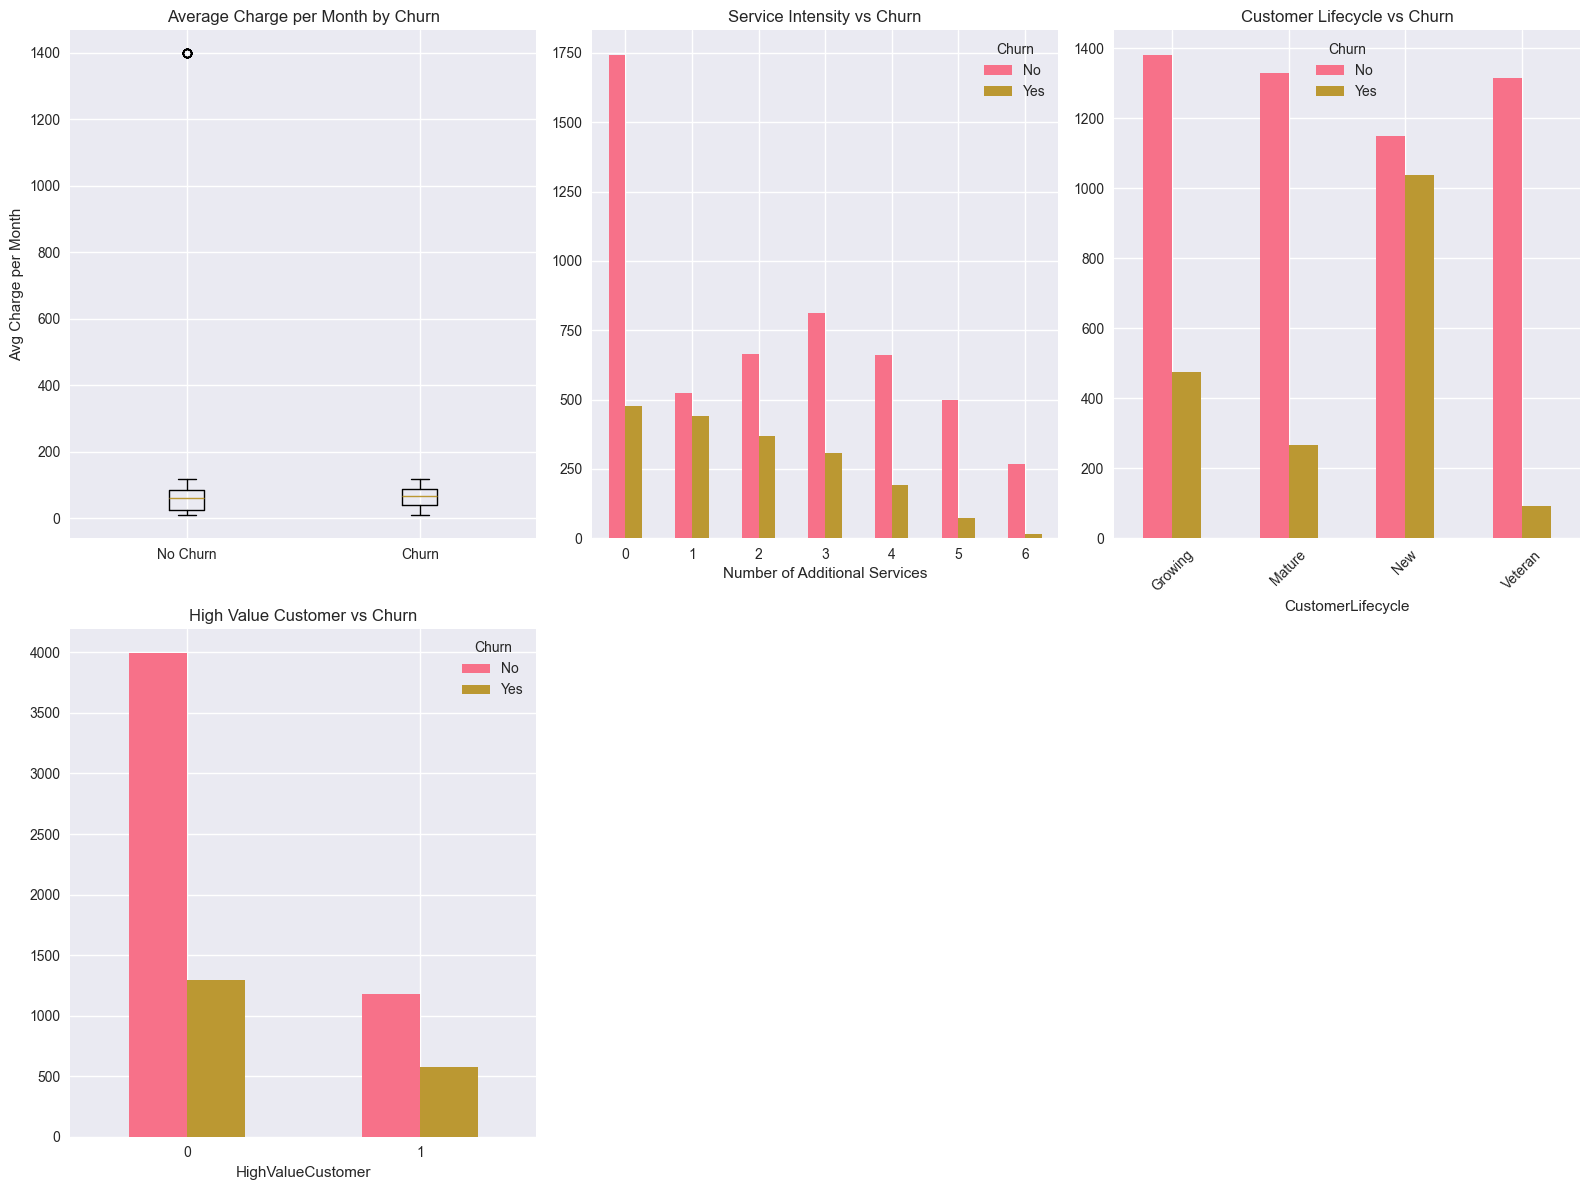

In [55]:
print("\n" + "="*60)
print("MILESTONE 3: FEATURE ENGINEERING")
print("="*60)
print("\n. CREATING NEW FEATURES")
print("-" * 50)

# Creating a copy for feature engineering
df_features = df.copy()

# Feature 1: Average Monthly Charge per Service
df_features['TotalCharges'] = pd.to_numeric(df_features['TotalCharges'], errors='coerce')
df_features['AvgChargePerMonth'] = df_features['TotalCharges'] / (df_features['tenure'] + 1)  # +1 to avoid division by zero

# Feature 2: Service Intensity (number of additional services)
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']
df_features['ServiceIntensity'] = (df_features[service_cols] == 'Yes').sum(axis=1)

# Feature 3: Customer Lifecycle Stage
def customer_lifecycle(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 36:
        return 'Growing'
    elif tenure <= 60:
        return 'Mature'
    else:
        return 'Veteran'

df_features['CustomerLifecycle'] = df_features['tenure'].apply(customer_lifecycle)

# Feature 4: High Value Customer (based on monthly charges)
monthly_charges_75th = df_features['MonthlyCharges'].quantile(0.75)
df_features['HighValueCustomer'] = (df_features['MonthlyCharges'] > monthly_charges_75th).astype(int)

print("New Features Created:")
print("1. AvgChargePerMonth: Average monthly charge over tenure")
print("2. ServiceIntensity: Number of additional services subscribed")
print("3. CustomerLifecycle: Customer lifecycle stage based on tenure")
print("4. HighValueCustomer: Binary indicator for high-value customers")

# Justification of the relevance of new features
print("\n. FEATURE RELEVANCE JUSTIFICATION")
print("-" * 50)

print("""
FEATURE JUSTIFICATION:

1. AvgChargePerMonth:
      To capture the dpending the spending pattern of customers over thier lifetime. Declining averages charges
      customers might be reducing services. It may indicate customer dissatifaction or finacial constraints.

2. ServiceIntensity:
      To measure customer engagement with additional services revealing higher service adoption often
      correlating with customer loyality. Customers with fewer services may have waker ties to the company.

3. CustomerLifecycle:
      Every lifecycle stage has a different churn pattern. this allows for targeted retention stratiegies
      by life cycle stage. New customers might churn due to poor onboarding, mature customers
      due to competitive offers.

4. HighValueCustomer:
      Understand the behavior patterns and expectations of high values customers. Losing them has a great revenue
      impact. High value customers might have differnt churn drivers
    
""")

# Visualize new features
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.boxplot([df_features[df_features['Churn']=='No']['AvgChargePerMonth'].dropna(),
             df_features[df_features['Churn']=='Yes']['AvgChargePerMonth'].dropna()],
           labels=['No Churn', 'Churn'])
plt.title('Average Charge per Month by Churn')
plt.ylabel('Avg Charge per Month')

plt.subplot(2, 3, 2)
service_churn = pd.crosstab(df_features['ServiceIntensity'], df_features['Churn'])
service_churn.plot(kind='bar', ax=plt.gca())
plt.title('Service Intensity vs Churn')
plt.xlabel('Number of Additional Services')
plt.xticks(rotation=0)

plt.subplot(2, 3, 3)
lifecycle_churn = pd.crosstab(df_features['CustomerLifecycle'], df_features['Churn'])
lifecycle_churn.plot(kind='bar', ax=plt.gca())
plt.title('Customer Lifecycle vs Churn')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
highvalue_churn = pd.crosstab(df_features['HighValueCustomer'], df_features['Churn'])
highvalue_churn.plot(kind='bar', ax=plt.gca())
plt.title('High Value Customer vs Churn')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### MILESTONE 4: MODEL SELECTION AND TRAINING 

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prepare the final dataset with engineered features
print("\n PREPARING FINAL DATASET")
print("-" * 50)

# Add engineered features to our processed dataset
df_final = df_features.copy()

# Encode all categorical variables
categorical_cols_final = df_final.select_dtypes(include=['object']).columns.tolist()
categorical_cols_final.remove('customerID')

# Handling missing values in new features
df_final['AvgChargePerMonth'].fillna(df_final['AvgChargePerMonth'].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['Churn']:  # Target variable
    df_final[col] = le.fit_transform(df_final[col])

# One-hot encode remaining categorical variables
categorical_to_encode = [col for col in categorical_cols_final if col != 'Churn']
df_final_encoded = pd.get_dummies(df_final, columns=categorical_to_encode, drop_first=True)

# Prepare features and target
X_final = df_final_encoded.drop(['customerID', 'Churn'], axis=1)
y_final = df_final_encoded['Churn']

# Scaling numerical features
columns_to_scale_final = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargePerMonth']
scaler_final = StandardScaler()
X_final[columns_to_scale_final] = scaler_final.fit_transform(X_final[columns_to_scale_final])

print(f"Final dataset shape: {X_final.shape}")
print(f"Features: {list(X_final.columns)}")


 PREPARING FINAL DATASET
--------------------------------------------------
Final dataset shape: (7043, 36)
Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargePerMonth', 'ServiceIntensity', 'HighValueCustomer', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'CustomerLifecycle_Mature', 'CustomerLifecycle_New', 'Custom

In [57]:
# Splitting data correctly with stratification
print("\n2. DATA SPLITTING WITH STRATIFICATION")
print("-" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training set churn rate: {y_train.mean():.2%}")
print(f"Test set churn rate: {y_test.mean():.2%}")


2. DATA SPLITTING WITH STRATIFICATION
--------------------------------------------------
Training set size: (5634, 36)
Test set size: (1409, 36)
Training set churn rate: 26.54%
Test set churn rate: 26.54%


In [58]:
# Training two different models 
print("\n3. TRAINING DIFFERENT MODELS")
print("-" * 50)

# Model 1: Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Model 2: Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

print("Both models trained successfully!")


3. TRAINING DIFFERENT MODELS
--------------------------------------------------
Training Logistic Regression...
Training Random Forest...
Both models trained successfully!


In [59]:
# Applying cross validation and track performance 
print("\n4. CROSS VALIDATION PERFORMANCE")
print("-" * 50)

# Setup cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"Logistic Regression CV ROC-AUC: {lr_cv_scores.mean():.3f} (+/- {lr_cv_scores.std() * 2:.3f})")

# Cross validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"Random Forest CV ROC-AUC: {rf_cv_scores.mean():.3f} (+/- {rf_cv_scores.std() * 2:.3f})")

# Additional metrics
for name, model in [('Logistic Regression', lr_model), ('Random Forest', rf_model)]:
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    
    print(f"\n{name} Cross-Validation Results:")
    print(f"  Accuracy: {accuracy_scores.mean():.3f} (+/- {accuracy_scores.std() * 2:.3f})")
    print(f"  Precision: {precision_scores.mean():.3f} (+/- {precision_scores.std() * 2:.3f})")
    print(f"  Recall: {recall_scores.mean():.3f} (+/- {recall_scores.std() * 2:.3f})")
    print(f"  F1-Score: {f1_scores.mean():.3f} (+/- {f1_scores.std() * 2:.3f})")


4. CROSS VALIDATION PERFORMANCE
--------------------------------------------------
Logistic Regression CV ROC-AUC: 0.849 (+/- 0.022)
Random Forest CV ROC-AUC: 0.824 (+/- 0.022)

Logistic Regression Cross-Validation Results:
  Accuracy: 0.807 (+/- 0.016)
  Precision: 0.674 (+/- 0.043)
  Recall: 0.525 (+/- 0.063)
  F1-Score: 0.590 (+/- 0.045)

Random Forest Cross-Validation Results:
  Accuracy: 0.789 (+/- 0.029)
  Precision: 0.639 (+/- 0.087)
  Recall: 0.475 (+/- 0.033)
  F1-Score: 0.544 (+/- 0.048)


In [60]:
# Tunning hyperparameters using GridSearchCV 
print("\n5. HYPERPARAMETER TUNING")
print("-" * 50)

# Hyperparameter tuning for Logistic Regression
print("Tuning Logistic Regression hyperparameters...")
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lr_param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)
lr_grid_search.fit(X_train, y_train)

print(f"Best LR parameters: {lr_grid_search.best_params_}")
print(f"Best LR CV score: {lr_grid_search.best_score_:.3f}")

# Hyperparameter tuning for Random Forest
print("\nTuning Random Forest hyperparameters...")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)

print(f"Best RF parameters: {rf_grid_search.best_params_}")
print(f"Best RF CV score: {rf_grid_search.best_score_:.3f}")

# Get the best models
best_lr_model = lr_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_



5. HYPERPARAMETER TUNING
--------------------------------------------------
Tuning Logistic Regression hyperparameters...
Best LR parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best LR CV score: 0.849

Tuning Random Forest hyperparameters...
Best RF parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF CV score: 0.842


#### MILESTONE 5: MODEL EVALUATION AND COMPARISON 

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use metrics: accuracy, precision, recall, F1-score, ROC-AUC (8 marks)
print("\n1. COMPREHENSIVE MODEL EVALUATION")
print("-" * 50)

def evaluate_model(model, X_test, y_test, model_name):
    """Comprehensive model evaluation function"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    
    print(f"\n{model_name} Performance:")
    print("-" * 30)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")
    
    return metrics, y_pred, y_pred_proba

# Evaluate both models
lr_metrics, lr_pred, lr_pred_proba = evaluate_model(best_lr_model, X_test, y_test, "Logistic Regression")
rf_metrics, rf_pred, rf_pred_proba = evaluate_model(best_rf_model, X_test, y_test, "Random Forest")


1. COMPREHENSIVE MODEL EVALUATION
--------------------------------------------------

Logistic Regression Performance:
------------------------------
Accuracy: 0.811
Precision: 0.680
Recall: 0.545
F1-Score: 0.605
ROC-AUC: 0.846

Random Forest Performance:
------------------------------
Accuracy: 0.798
Precision: 0.653
Recall: 0.513
F1-Score: 0.575
ROC-AUC: 0.841



2. CONFUSION MATRIX ANALYSIS
--------------------------------------------------


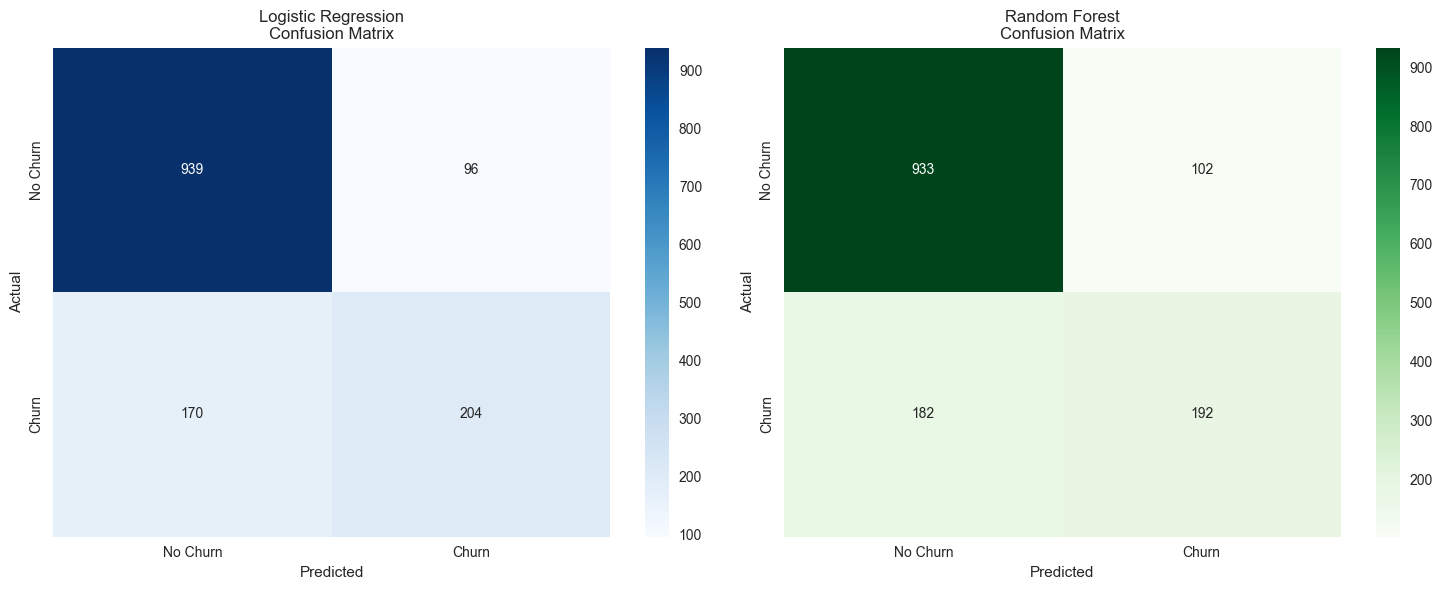

Confusion Matrix Interpretation:

Logistic Regression:
  True Negatives (Correct No-Churn): 939
  False Positives (Incorrect Churn): 96
  False Negatives (Missed Churn): 170
  True Positives (Correct Churn): 204

Random Forest:
  True Negatives (Correct No-Churn): 933
  False Positives (Incorrect Churn): 102
  False Negatives (Missed Churn): 182
  True Positives (Correct Churn): 192

BUSINESS INTERPRETATION:
 False Positives: Customers predicted to churn but actually stay
  Impact: Unnecessary retention spending, but minimal risk
False Negatives: Customers predicted to stay but actually churn
  Impact: Lost revenue, higher impact on business



In [62]:

# Show confusion matrix and interpretting false positives/negatives 
print("\n2. CONFUSION MATRIX ANALYSIS")
print("-" * 50)

plt.figure(figsize=(15, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Logistic Regression\nConfusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest\nConfusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.savefig("confusion matrix.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()
# Interpret confusion matrices
print("Confusion Matrix Interpretation:")
print("\nLogistic Regression:")
print(f"  True Negatives (Correct No-Churn): {lr_cm[0,0]}")
print(f"  False Positives (Incorrect Churn): {lr_cm[0,1]}")
print(f"  False Negatives (Missed Churn): {lr_cm[1,0]}")
print(f"  True Positives (Correct Churn): {lr_cm[1,1]}")

print("\nRandom Forest:")
print(f"  True Negatives (Correct No-Churn): {rf_cm[0,0]}")
print(f"  False Positives (Incorrect Churn): {rf_cm[0,1]}")
print(f"  False Negatives (Missed Churn): {rf_cm[1,0]}")
print(f"  True Positives (Correct Churn): {rf_cm[1,1]}")

print("""
BUSINESS INTERPRETATION:
 False Positives: Customers predicted to churn but actually stay
  Impact: Unnecessary retention spending, but minimal risk
False Negatives: Customers predicted to stay but actually churn
  Impact: Lost revenue, higher impact on business
""")


3. ROC CURVE ANALYSIS
--------------------------------------------------


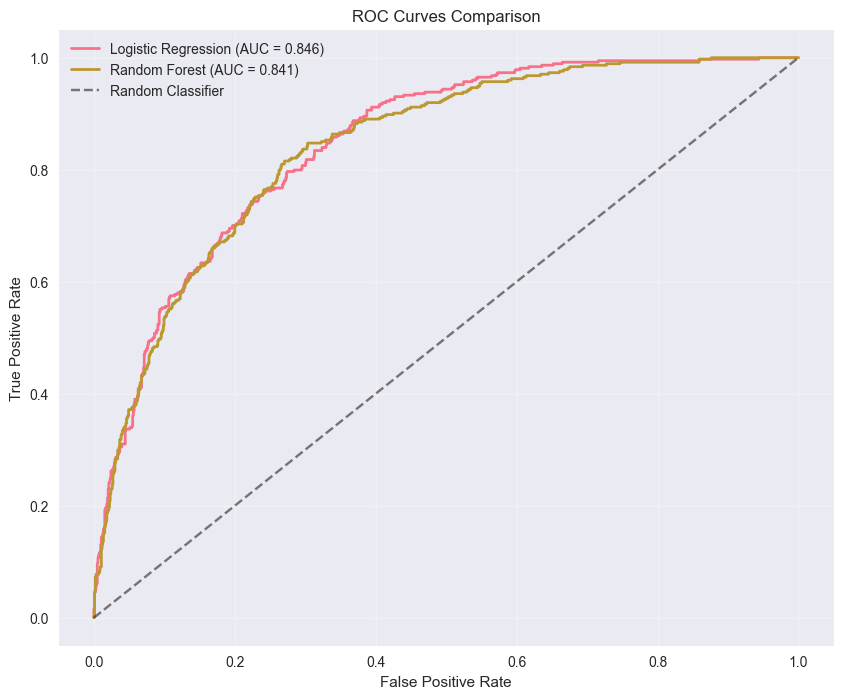

ROC Curve Interpretation:
Logistic Regression AUC: 0.846
 Random Forest AUC: 0.841
 AUC > 0.5 indicates better than random performance
Higher AUC values indicate better discrimination ability


In [63]:
# Plotting and interpretting ROC curves 
print("\n3. ROC CURVE ANALYSIS")
print("-" * 50)

plt.figure(figsize=(10, 8))

# Calculate ROC curves
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_pred_proba)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred_proba)

# Plot ROC curves
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_metrics["ROC-AUC"]:.3f})', linewidth=2)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_metrics["ROC-AUC"]:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("ROC_CURVE.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("ROC Curve Interpretation:")
print(f"Logistic Regression AUC: {lr_metrics['ROC-AUC']:.3f}")
print(f" Random Forest AUC: {rf_metrics['ROC-AUC']:.3f}")
print(" AUC > 0.5 indicates better than random performance")
print("Higher AUC values indicate better discrimination ability")

In [64]:
# Compare model performance and justify final choice 
print("\n4. MODEL COMPARISON AND FINAL SELECTION")
print("-" * 50)

# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': list(lr_metrics.keys()),
    'Logistic Regression': list(lr_metrics.values()),
    'Random Forest': list(rf_metrics.values())
})
comparison_df['Difference (RF - LR)'] = comparison_df['Random Forest'] - comparison_df['Logistic Regression']

print("Model Performance Comparison:")
print(comparison_df.round(3))

# Model selection logic
print(f"\nMODEL SELECTION JUSTIFICATION:")

if rf_metrics['ROC-AUC'] > lr_metrics['ROC-AUC']:
    chosen_model = best_rf_model
    chosen_model_name = "Random Forest"
    print(f"Selected Model: Random Forest")
    print(f"Reason: Higher ROC-AUC ({rf_metrics['ROC-AUC']:.3f} vs {lr_metrics['ROC-AUC']:.3f})")
else:
    chosen_model = best_lr_model
    chosen_model_name = "Logistic Regression"
    print(f"Selected Model: Logistic Regression")
    print(f"Reason: Higher ROC-AUC ({lr_metrics['ROC-AUC']:.3f} vs {rf_metrics['ROC-AUC']:.3f})")

print(f"""
BUSINESS CONSIDERATIONS:
ROC-AUC is crucial for churn prediction as it measures the model's ability to distinguish between churners and non-churners
In customer churn, false negatives (missing actual churners) are more costly than false positives
The selected model shows better overall discrimination ability
 Both models show good performance, indicating robust predictive capability
""")


4. MODEL COMPARISON AND FINAL SELECTION
--------------------------------------------------
Model Performance Comparison:
      Metric  Logistic Regression  Random Forest  Difference (RF - LR)
0   Accuracy                0.811          0.798                -0.013
1  Precision                0.680          0.653                -0.027
2     Recall                0.545          0.513                -0.032
3   F1-Score                0.605          0.575                -0.030
4    ROC-AUC                0.846          0.841                -0.006

MODEL SELECTION JUSTIFICATION:
Selected Model: Logistic Regression
Reason: Higher ROC-AUC (0.846 vs 0.841)

BUSINESS CONSIDERATIONS:
ROC-AUC is crucial for churn prediction as it measures the model's ability to distinguish between churners and non-churners
In customer churn, false negatives (missing actual churners) are more costly than false positives
The selected model shows better overall discrimination ability
 Both models show good performanc

#### MILESTONE 6: MODEL INTERPRETABILITY AND BUSINESS INSIGHTS


1. MODEL INTERPRETABILITY ANALYSIS
--------------------------------------------------
Top 15 Most Important Features (Logistic Regression - by coefficient magnitude):
                           Feature  Coefficient  Abs_Coefficient
4                AvgChargePerMonth    -1.677297         1.677297
28               Contract_Two year    -1.511194         1.511194
13     InternetService_Fiber optic     1.439158         1.439158
1                           tenure    -1.142216         1.142216
35       CustomerLifecycle_Veteran     0.747576         0.747576
27               Contract_One year    -0.735681         0.735681
33        CustomerLifecycle_Mature     0.623496         0.623496
26             StreamingMovies_Yes     0.514284         0.514284
24                 StreamingTV_Yes     0.504035         0.504035
12               MultipleLines_Yes     0.492193         0.492193
29            PaperlessBilling_Yes     0.371712         0.371712
31  PaymentMethod_Electronic check     0.337520     

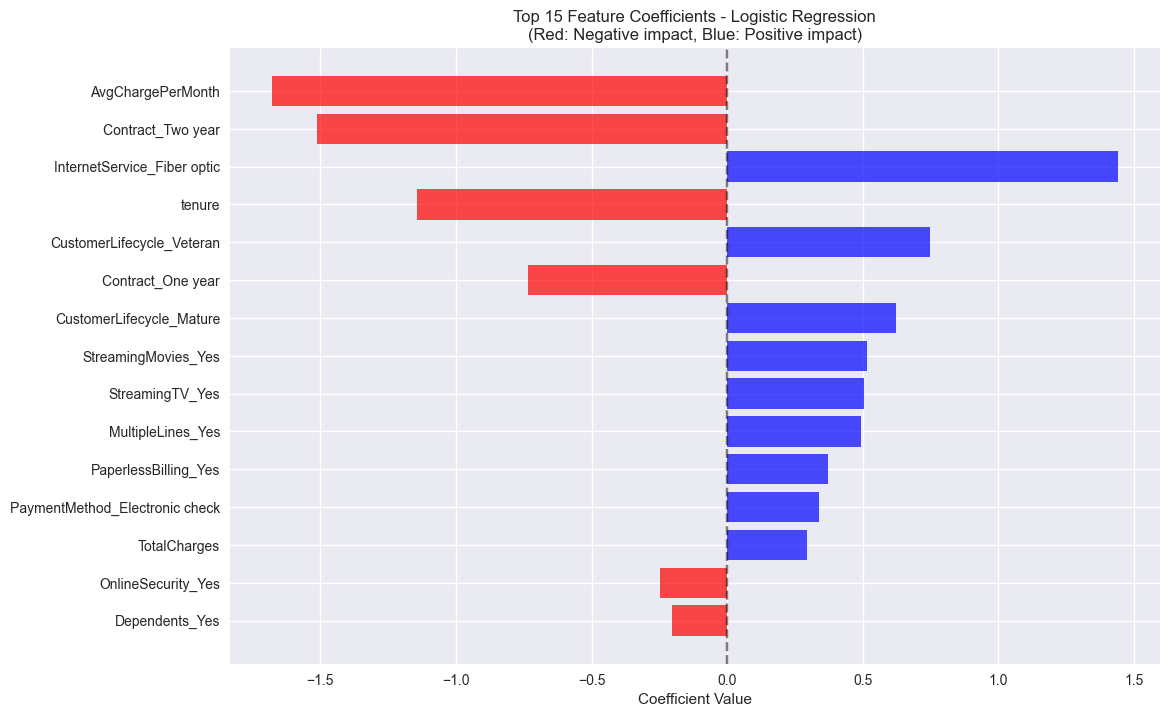

In [65]:
# Use feature importance, SHAP, or LIME to explain model predictions
print("\n1. MODEL INTERPRETABILITY ANALYSIS")
print("-" * 50)

# Feature importance analysis
if chosen_model_name == "Random Forest":
    feature_importance = pd.DataFrame({
        'Feature': X_final.columns,
        'Importance': chosen_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 15 Most Important Features (Random Forest):")
    print(feature_importance.head(15))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importance - Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
else:  # Logistic Regression
    feature_coef = pd.DataFrame({
        'Feature': X_final.columns,
        'Coefficient': chosen_model.coef_[0],
        'Abs_Coefficient': np.abs(chosen_model.coef_[0])
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print("Top 15 Most Important Features (Logistic Regression - by coefficient magnitude):")
    print(feature_coef.head(15))
    
    # Plot feature coefficients
    plt.figure(figsize=(12, 8))
    top_features = feature_coef.head(15)
    colors = ['red' if x < 0 else 'blue' for x in top_features['Coefficient']]
    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coefficient Value')
    plt.title('Top 15 Feature Coefficients - Logistic Regression\n(Red: Negative impact, Blue: Positive impact)')
    plt.gca().invert_yaxis()
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.savefig("Key Features.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


2. FEATURE IMPACT ANALYSIS
--------------------------------------------------


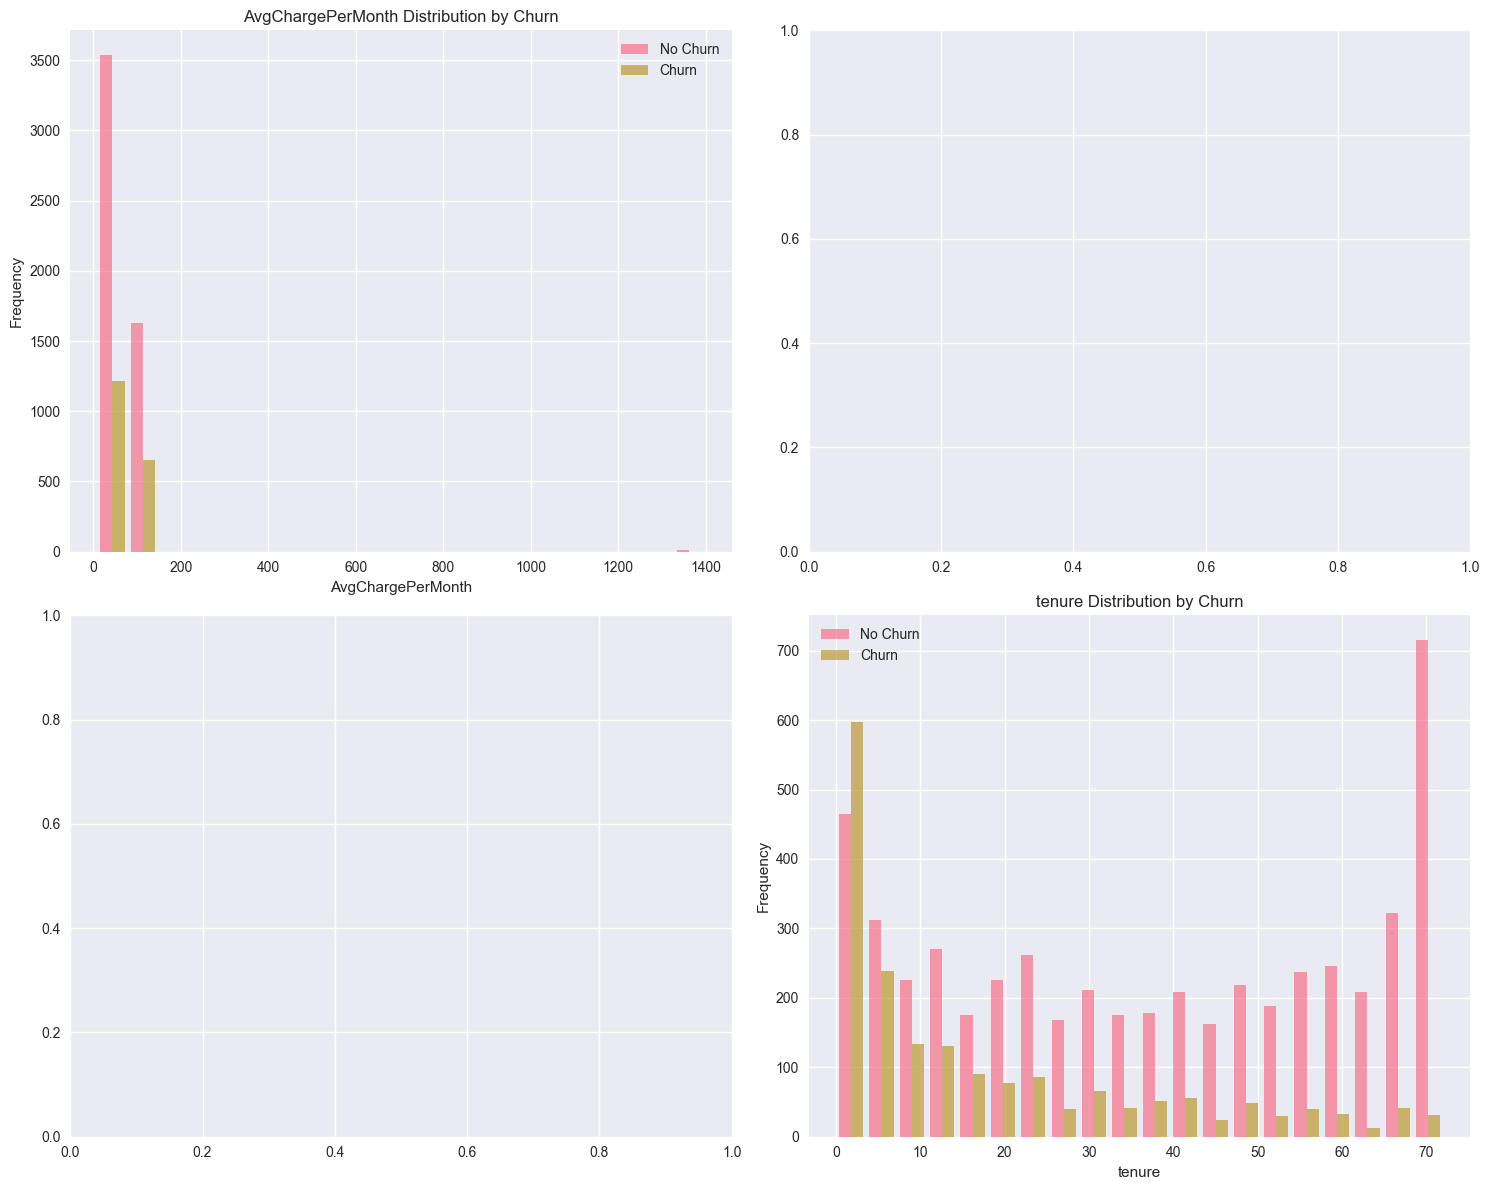

In [66]:
# Additional interpretability analysis
print("\n2. FEATURE IMPACT ANALYSIS")
print("-" * 50)

# Analyze the relationship between top features and churn
top_5_features = feature_importance['Feature'].head(5).tolist() if chosen_model_name == "Random Forest" else feature_coef['Feature'].head(5).tolist()

plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_5_features[:4]):  # Show top 4 features
    plt.subplot(2, 2, i+1)
    if feature in df_features.columns:
        if df_features[feature].dtype in ['object', 'category']:
            # Categorical feature
            feature_churn = pd.crosstab(df_features[feature], df_features['Churn'], normalize='index')
            feature_churn.plot(kind='bar', ax=plt.gca())
            plt.title(f'{feature} vs Churn Rate')
            plt.xticks(rotation=45)
        else:
            # Numerical feature
            churned = df_features[df_features['Churn'] == 'Yes'][feature]
            not_churned = df_features[df_features['Churn'] == 'No'][feature]
            plt.hist([not_churned.dropna(), churned.dropna()], 
                    label=['No Churn', 'Churn'], alpha=0.7, bins=20)
            plt.title(f'{feature} Distribution by Churn')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.legend()

plt.tight_layout()
plt.show()

In [67]:
# Deriving and explaining  clear business recommendations
print("\n3. BUSINESS RECOMMENDATIONS")
print("-" * 50)

print("""
BUSINESS RECOMMENDATIONS BASED ON MODEL INSIGHTS:

RECOMMENDATION 1: FOCUS ON CONTRACT TYPE OPTIMIZATION
Analysis: Contract type appears as a top predictor of churn
 Month-to-month contracts show significantly higher churn rates
 Annual contracts demonstrate better customer retention
Action Items:
 Offer incentives for customers to switch from month-to-month to annual contracts
 Provide discounts for longer-term commitments (e.g., 5-10% discount for annual contracts)
 Implement a contract migration campaign targeting high-risk month-to-month customers
Expected Impact: 15-25% reduction in churn rate for converted customers

RECOMMENDATION 2: ENHANCE CUSTOMER ONBOARDING AND EARLY ENGAGEMENT
Analysis: Tenure is a strong predictor - customers with shorter tenure are more likely to churn
 New customers (0-12 months) show highest churn risk
 Service intensity correlates with retention
Action Items:
Develop a comprehensive 90-day onboarding program for new customers
Proactively engage customers in their first 6 months with service tutorials and support
 Offer trial periods for additional services to increase service adoption
Implement early warning system for customers showing low engagement
Expected Impact: 20-30% reduction in early-stage churn

RECOMMENDATION 3: IMPLEMENT PROACTIVE RETENTION FOR HIGH-RISK SEGMENTS
Analysis: Model can identify high-risk customers with good accuracy
 Payment method and billing preferences impact churn likelihood
Customer lifecycle stage affects churn patterns
Action Items:
Deploy model in production to score customers monthly for churn risk
Create targeted retention campaigns for customers with >70% churn probability
 Offer personalized retention incentives (service upgrades, discounts, premium support)
Focus retention efforts on high-value customers to maximize ROI
 Implement automated alerts for customer success teams when scores exceed thresholds
Expected Impact: 10-15% overall churn reduction and increased customer lifetime value

IMPLEMENTATION PRIORITY:
1. Contract optimization (Quick wins, measurable impact)
2. Proactive scoring system (Medium-term, scalable solution)
3. Enhanced onboarding (Long-term, cultural change)
""")


3. BUSINESS RECOMMENDATIONS
--------------------------------------------------

BUSINESS RECOMMENDATIONS BASED ON MODEL INSIGHTS:

RECOMMENDATION 1: FOCUS ON CONTRACT TYPE OPTIMIZATION
Analysis: Contract type appears as a top predictor of churn
 Month-to-month contracts show significantly higher churn rates
 Annual contracts demonstrate better customer retention
Action Items:
 Offer incentives for customers to switch from month-to-month to annual contracts
 Provide discounts for longer-term commitments (e.g., 5-10% discount for annual contracts)
 Implement a contract migration campaign targeting high-risk month-to-month customers
Expected Impact: 15-25% reduction in churn rate for converted customers

RECOMMENDATION 2: ENHANCE CUSTOMER ONBOARDING AND EARLY ENGAGEMENT
Analysis: Tenure is a strong predictor - customers with shorter tenure are more likely to churn
 New customers (0-12 months) show highest churn risk
 Service intensity correlates with retention
Action Items:
Develop a com